In [1]:
% matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

In [4]:
from limlam_mocker import limlam_mocker as llm
#Get Parameters for run
from limlam_mocker import params        as params

In [2]:
data = np.load('limlam_mocker/Lco_cube_trial.npz')

In [3]:
data

In [4]:
data.keys()

['map_cube',
 'fov_y',
 'fov_x',
 'map_pixel_ra',
 'map_frequencies',
 'npix_x',
 'npix_y',
 'map_pixel_dec',
 'pix_size_x',
 'pix_size_y']

In [10]:
data['map_cube'][:,:,params.nmaps//3]

array([[0.31790901, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.78196719, 0.14192624, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

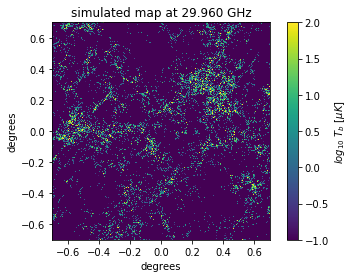

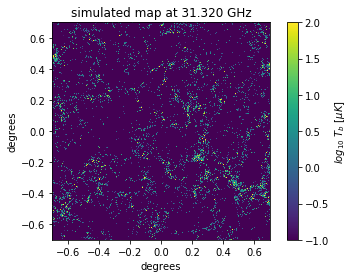

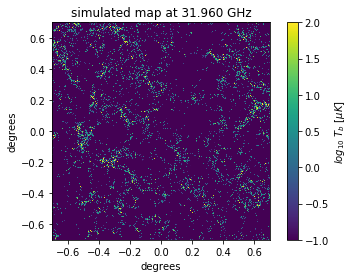

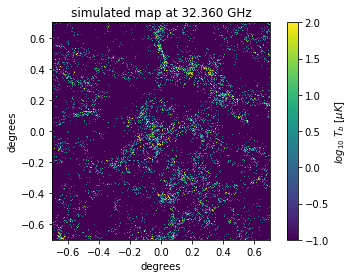

In [11]:
for i in range(2,6):
    if i == 1 or i == 0:
        continue
    plt.figure()
    im = plt.imshow(np.log10(data['map_cube'][:,:,params.nmaps//i]+1e-6), 
                    extent=[-data['fov_x']/2,data['fov_x']/2,-data['fov_y']/2,data['fov_y']/2],
                    vmin=-1,vmax=2)

    plt.colorbar(im,label=r'$log_{10}\ T_b\ [\mu K]$')
    plt.xlabel('degrees')
    plt.ylabel('degrees')
    plt.title('simulated map at {0:.3f} GHz'.format(data['map_frequencies'][params.nmaps//i]))

In [12]:
params.nmaps//4

25

In [15]:
llm.debug.verbose = True
params.halo_catalogue_file = 'limlam_mocker/' + params.halo_catalogue_file
llm.write_time('Starting Line Intensity Mapper')



------------------------------------------------------------------------
Starting Line Intensity Mapper
Time:      11:53:22 on 08/10/2018
------------------------------------------------------------------------



In [16]:
### Setup maps to output
mapinst   = llm.params_to_mapinst(params);

### Load halos from catalogue
halos, cosmo = llm.load_peakpatch_catalogue(params.halo_catalogue_file)
halos        = llm.cull_peakpatch_catalogue(halos, params.min_mass, mapinst)

### Calculate Luminosity of each halo
halos.Lco    = llm.Mhalo_to_Lco(halos, params.model, params.coeffs)

	halo catalogue contains:
		 ['cosmo_header', 'M', 'zform', 'vx', 'zhalo', 'vy', 'y', 'x', 'vz', 'z']

	887751 halos loaded

	887729 halos remain after mass/map cut

	Mhalo to Lco calculated


In [17]:
len(halos.Lco)

887729

In [18]:
halos.Lco

array([5.70784006e+05, 2.69267345e+05, 6.39682722e+05, ...,
       4.67627894e+03, 4.79030841e+02, 3.84519382e+03])

In [30]:
index = np.argwhere(halos.Lco==0.0)
lco = np.delete(halos.Lco, index)

In [31]:
vals, bins = np.histogram(lco, bins=np.logspace(np.log10(min(lco)),np.log10(max(lco)), 50))

lFunc = [0]*len(vals)

for i in reversed(range(len(vals))):
    if(len(vals)-1 == i):
        lFunc[i] = vals[i]
    else:
        lFunc[i] = lFunc[i+1] + vals[i]

In [32]:
logLCent = [0]*len(vals)
lCent = [0]*len(vals)

for i in range(len(vals)):
    logLCent[i] = 10**((np.log10(bins[i]) + np.log10(bins[i+1]))/2)
    lCent[i] = (bins[i] + bins[i+1])/2


In [33]:
lFuncLog = [lFunc[i]*logLCent[i] for i in range(len(lFunc))]

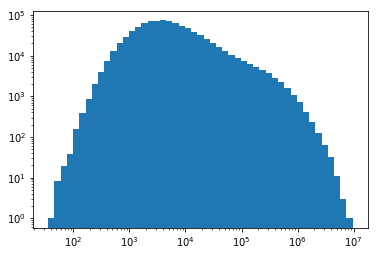

In [34]:
plt.hist(lco, bins=np.logspace(np.log10(min(lco)),np.log10(max(lco)), 50))
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")
plt.show()

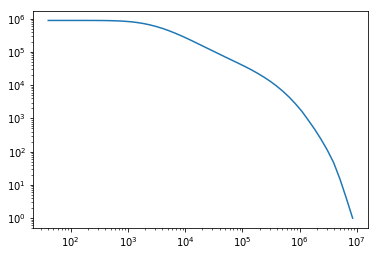

In [35]:
plt.plot(logLCent, lFunc)
plt.yscale('log')
plt.xscale('log')
plt.show()

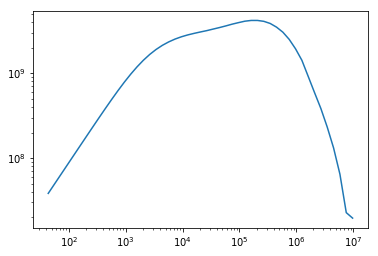

In [68]:
plt.plot(logLCent, lFuncLog)
plt.yscale('log')
plt.xscale('log')
plt.show()

In [123]:
name = 'maps/Lco_cube_trial.npz'

In [83]:
from pathlib import Path

In [124]:
fName = Path(name)

In [125]:
print(fName.name)
print(fName.suffix)
print(fName.absolute)
print(fName.parent)
print(fName.stem)

Lco_cube_trial.npz
.npz
<bound method Path.absolute of PosixPath('maps/Lco_cube_trial.npz')>
maps
Lco_cube_trial


In [44]:
fName.mkdir(parents=True, exist_ok=True)

In [126]:
parent = Path(fName.parent)
# parent.mkdir(parents=True, exist_ok=True)

print('it worked')

it worked


In [118]:
parent.name

'maps'

In [105]:
if(parent.is_dir):
    print('what')

what


In [94]:
fName2 = Path('{0}/{1}'.format(fName.parent, fName.name))
print(fName2.name)
print(fName2.suffix)
print(fName2.absolute)
print(fName2.parent)
print(fName2.stem)

Lco_cube_trial.npz
.npz
<bound method Path.absolute of PosixPath('tacos/maps/Lco_cube_trial.npz')>
tacos/maps
Lco_cube_trial


In [98]:
str(fName)

'tacos/maps/Lco_cube_trial.npz'

In [110]:
fName.name[:-len(fName.suffix)]

'Lco_cube_trial'

In [127]:
parent

PosixPath('maps')

In [128]:
parent.iterdir()

[PosixPath('maps/Lco_cube_trial_map.npz'),
 PosixPath('maps/.DS_Store'),
 PosixPath('maps/Lco_cube_test_map.npz'),
 PosixPath('maps/Lco_cube_trial.npz'),
 PosixPath('maps/Lco_cube_trial_lum.npz'),
 PosixPath('maps/Lco_cube_test_lum.npz')]

In [137]:
names = []
for path in parent.iterdir():
    if path.name[0] == '.':
        continue
    print(path.name)
    names.append(path.name[:-(len(path.suffix)+4)])
    
print(names)
list(sorted(set(names)))

Lco_cube_trial_map.npz
Lco_cube_test_map.npz
Lco_cube_trial.npz
Lco_cube_trial_lum.npz
Lco_cube_test_lum.npz
['Lco_cube_trial', 'Lco_cube_test', 'Lco_cube_t', 'Lco_cube_trial', 'Lco_cube_test']


['Lco_cube_t', 'Lco_cube_test', 'Lco_cube_trial']

In [141]:
[a for a in dir(params) if not a.startswith('__')]

['coeffs',
 'fov_x',
 'fov_y',
 'halo_catalogue_file',
 'map_output_file',
 'min_mass',
 'model',
 'nmaps',
 'npix_x',
 'npix_y',
 'nu_f',
 'nu_i',
 'nu_rest',
 'plot_cube',
 'plot_pspec']